In [1]:
!pip install jsonlines

In [2]:
!ls data/SubtaskA

subtaskA_dev_monolingual.jsonl	 subtaskA_train_monolingual.jsonl
subtaskA_dev_multilingual.jsonl  subtaskA_train_multilingual.jsonl


In [3]:
import jsonlines
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
ROOT_DIR = 'data/SubtaskA'
FILE_DIR = f'{ROOT_DIR}/subtaskA_train_monolingual.jsonl'

In [5]:
data = []
with jsonlines.open(FILE_DIR) as fp:
    for obj in fp:
        data.append(obj)

print(f"total data: {len(data)}")
print(f"keys: {data[0].keys()}")

total data: 119757
keys: dict_keys(['text', 'label', 'model', 'source', 'id'])


In [6]:
def plot_histogram(counts_dict, title="Histogram", xlabel="X-axis", ylabel="Frequency"):
    """
    Plot a histogram given a dictionary of counts.

    Parameters:
    - counts_dict: Dictionary where keys represent values and values represent counts.
    - title: Title of the plot (default: "Histogram").
    - xlabel: Label for the X-axis (default: "X-axis").
    - ylabel: Label for the Y-axis (default: "Frequency").
    """
    # Extract keys and values from the dictionary
    values = list(counts_dict.keys())
    frequencies = list(counts_dict.values())

    # Plot the histogram
    plt.bar(values, frequencies, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [7]:
models = defaultdict(int)
labels = defaultdict(int)
sources = defaultdict(int)
human_text_len = []
machine_text_len = []
text_len = []

for obj in data:
    models[obj['model']] += 1
    sources[obj['source']] += 1
    
    label = "machine" if obj['label'] else "human"
    labels[label] += 1
    
    text = obj['text']
    text_len.append(len(text))
    if label == "human": human_text_len.append(len(text))
    else: machine_text_len.append(len(text))

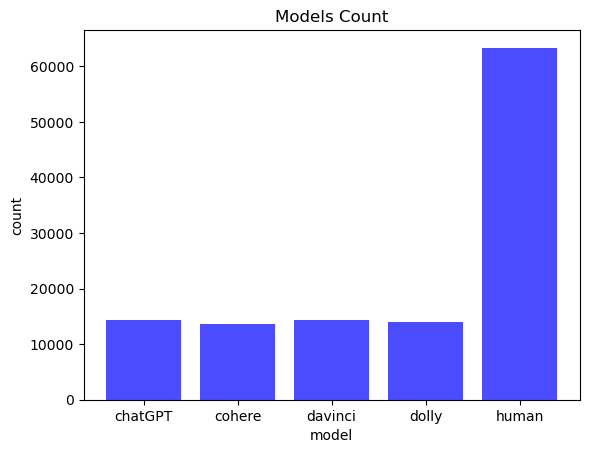

In [8]:
plot_histogram(models, title="Models Count", xlabel="model", ylabel="count")

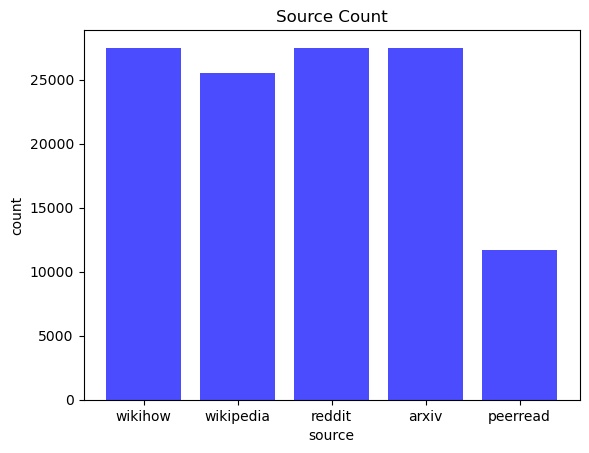

In [9]:
plot_histogram(sources, title="Source Count", xlabel="source", ylabel="count")

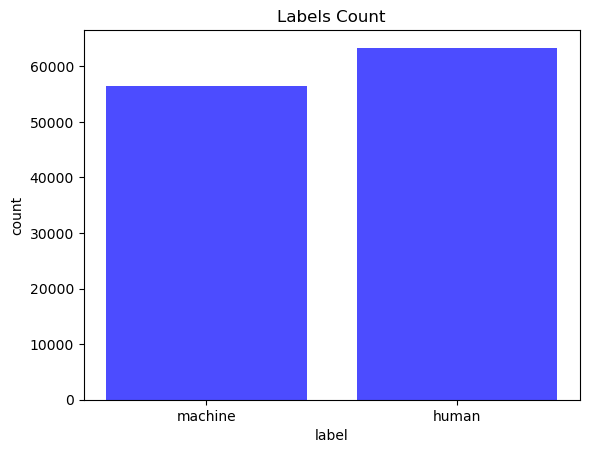

In [10]:
plot_histogram(labels, title="Labels Count", xlabel="label", ylabel="count")

In [11]:
np.mean(human_text_len), np.mean(machine_text_len), np.mean(text_len)

(3547.2660100077346, 1931.0316632982308, 2786.013519042728)

In [12]:
pd.DataFrame(human_text_len).describe()

,0
count,63351.000000
mean,3547.266010
std,5319.834821
min,10.000000
25%,1285.000000
50%,1804.000000
75%,3724.000000
max,198470.000000


In [13]:
pd.DataFrame(machine_text_len).describe()

,0
count,56406.000000
mean,1931.031663
std,1108.084847
min,42.000000
25%,1230.000000
50%,1648.000000
75%,2234.000000
max,14807.000000


In [14]:
pd.DataFrame(text_len).describe()

,0
count,119757.000000
mean,2786.013519
std,4024.922554
min,10.000000
25%,1262.000000
50%,1712.000000
75%,2742.000000
max,198470.000000


In [15]:
data[80]

{'text': "How to Separate Your Professional and Private Life\n\nHaving a healthy work-life balance is crucial for maintaining your well-being and happiness. After all, your personal life is just as important as your career. Separating your professional and private life can be difficult, especially if you have multiple roles. In this article, we will explore some tips on how to separate your professional and private life effectively.\n\n1. List the Multiple Roles You May Have\n\nA single person may fill a number of different roles all at once or at different times in life: employee, employer, student, sibling, significant other, child, parent, caregiver, etc. it is important to identify and acknowledge all of your roles so you can create boundaries that enable you to switch from one to the other with minimal stress.\n\n2. Go to and Leave Work at the Same Times Each Day\n\nIf you are never certain of when your workday will begin or end, it can be difficult to separate it from your person

In [16]:
data[0]

{'text': 'Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you\'re a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.\n\nStep 1. Insert The Game Disc\n\nThe first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.\n\nStep 2. Choose Your Game\n\nOnce the game is set up, choose the game you\'d like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.\n\nStep 3. Just Make A Quick Race By The Arcade Mode\n\nOnce the Arcade mode is selected, choose "Quick Race" to get started quickly.\n\nStep 4. Pick A Racetrack\n\nPick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose fro

In [17]:
from transformers import pipeline
import time
from tqdm import tqdm, trange

In [20]:
GENERATION_MODELS = [
    # ("facebook/bart-base", 2)
    ("t5-small", 6),
    ("t5-base", 3),
    ("t5-large", 1),
    # ("gpt2", 2
    # ("facebook/opt-1.3b", 6)
]

In [22]:
x = data[0]['text']
print(x)
print("----" * 20)

for (model_name, max_b) in tqdm(GENERATION_MODELS):
    start_time = time.time()
    
    for b in trange(1, max_b + 1):
        generator = pipeline('text-generation', model=model_name, max_new_tokens=20)
        outputs = generator(x)
        print(outputs[0]['generated_text'])
        print(model_name + " " + str(b) + " ----" * 10)
        print(str(time.time() - start_time) + " ---- " + str((time.time() - start_time) / 5))
        print("----" * 20)

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

  0%|          | 0/6 [00:00<?, ?it/s]The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForC

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And


  0%|          | 0/3 [00:00<?, ?it/s]The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusFor

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PersimmonForCausalLM', 'PL

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And


  0%|          | 0/1 [00:00<?, ?it/s]/home/sroydip1/.conda/envs/pl/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-large automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', '

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

In [181]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import re

In [196]:
GENERATION_MODELS = [
    ("facebook/mbart-large-50", 6),
    ("google/mt5-small", 6),
    ("google/mt5-base", 6),
    ("google/mt5-large", 6),
]

GENERATION_MODELS = [
    ("facebook/bart-base", 2),
    ("t5-small", 6),
    ("t5-base", 6),
    ("t5-large", 6),
]

In [193]:
tokenizers = []
generation_models = []
for model_name, _ in GENERATION_MODELS:
    tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=4096, legacy=False)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    tokenizers.append(tokenizer)
    generation_models.append(model)

In [197]:
x = data[0]["text"]
# x = obj['text']
xx = x.replace("\n", " ")
xx = re.sub(r"\s+", " ", xx)
print(x)
print("----" * 20)
print(xx)
print("----" * 20)

for (model_name, max_b), tokenizer, model in zip(GENERATION_MODELS, tokenizers, generation_models):
    start_time = time.time()
    for b in trange(1, max_b + 1):
        inputs = tokenizer(xx, return_tensors="pt")
        outputs = model.generate(**inputs, max_length=4096, num_beams=b, early_stopping=(b > 1))
        print(model_name + " " + str(b) + " ----" * 10)
        print(tokenizer.decode(outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True))
        print(str(time.time() - start_time) + " ---- " + str((time.time() - start_time) / 5))
        print("----" * 20)
    # inputs = tokenizer(x, return_tensors="pt")
    # outputs = model.generate(**inputs, max_length=2*len(x.split(" ")), num_beams=3, early_stopping=True)
    # print(tokenizer.decode(outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True))
    # print("----" * 100)

Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.

Step 1. Insert The Game Disc

The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.

Step 2. Choose Your Game

Once the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.

Step 3. Just Make A Quick Race By The Arcade Mode

Once the Arcade mode is selected, choose "Quick Race" to get started quickly.

Step 4. Pick A Racetrack

Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.

Step 5. Pick A Class And

 50%|█████     | 1/2 [00:24<00:24, 24.75s/it]

facebook/bart-base 1 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza. Step 1. Insert The Game Disc The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game. Step 2. Choose Your Game Once the game is set up, choose the game you'd like to play. Forza has different modes: Career, Free Play, and Arcade. In the article, our will focus on the Arcade mode. Step 3. Just Make A Quick Race By The Arcade Mode Once the Arcade Mode is selected, choose "Quick Race" to get started quickly. Step 4. Pick A Racetrack Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything 

100%|██████████| 2/2 [00:58<00:00, 29.14s/it]


facebook/bart-base 2 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motors. Step 1. Insert The Game Disc The first step is to insert the game disc into your console or computer. Follow the instructions to set up the game. Step 2. Choose Your Game Once the game is set up, choose the game you'd like to play. Forza has different modes: Career, Free Play, and Arcade. You will focus on the Arcade mode. Step 3. Just Make A Quick Race By The Arcade Mode Once the Arcade Mode is selected, choose "Quick Race" to get started quickly. Step 4. Pick A Racetrack Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose

 17%|█▋        | 1/6 [00:01<00:09,  1.82s/it]

t5-small 1 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
. Step 2. Insert The Game Disc The first step is to insert the game disc into your console or computer. Step 11. Replay the Race If you feel lonely and wanted an operant, choose the "Ghost car" setting and turn it on. Step 12. Have Fun And Enjoy The Game!
1.817263126373291 ---- 0.3634540557861328
--------------------------------------------------------------------------------


 33%|███▎      | 2/6 [00:04<00:08,  2.09s/it]

t5-small 2 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
. Step 2. Insert The Game Disc The first step is to insert the game disc into your console or computer. Step 11. Replay the Race If you feel lonely and wanted an operant, choose the "Ghost car" setting and turn it on. Step 12. Have Fun And Enjoy The Game!
4.100639343261719 ---- 0.8201291561126709
--------------------------------------------------------------------------------


 50%|█████     | 3/6 [00:07<00:07,  2.51s/it]

t5-small 3 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
. Step 2. Insert The Game Disc The first step is to insert the game disc into your console or computer. Step 11. Replay the Race If you feel lonely and wanted an operant, choose the "Ghost car" setting and turn it on. Step 12. Have Fun And Enjoy The Game!
7.119739294052124 ---- 1.4239490985870362
--------------------------------------------------------------------------------


 67%|██████▋   | 4/6 [00:11<00:06,  3.11s/it]

t5-small 4 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
. Step 2. Insert The Game Disc The first step is to insert the game disc into your console or computer. Step 11. Replay the Race If you feel lonely and wanted an operant, choose the "Ghost car" setting and turn it on. Step 12. Have Fun And Enjoy The Game!
11.142301082611084 ---- 2.2284614562988283
--------------------------------------------------------------------------------


 83%|████████▎ | 5/6 [00:15<00:03,  3.57s/it]

t5-small 5 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
. Step 2. Insert The Game Disc The first step is to insert the game disc into your console or computer. Step 11. Replay the Race If you feel lonely and wanted an operant, choose the "Ghost car" setting and turn it on. Step 12. Have Fun And Enjoy The Game!
15.527855396270752 ---- 3.1055724143981935
--------------------------------------------------------------------------------


100%|██████████| 6/6 [00:21<00:00,  3.56s/it]


t5-small 6 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
. Step 2. Insert The Game Disc The first step is to insert the game disc into your console or computer. Step 11. Replay the Race If you feel lonely and wanted an operant, choose the "Ghost car" setting and turn it on. Step 12. Have Fun And Enjoy The Game! In conclusion, Forza Motorsport can be a fun game with its impressive graphics, user-friendly interface, and thrilling gameplay.
21.3388671875 ---- 4.267774677276611
--------------------------------------------------------------------------------


 17%|█▋        | 1/6 [00:04<00:20,  4.04s/it]

t5-base 1 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Step 3. Set Up The Game Step 3. Choose The Mode the game will start. you can also watch a video of the race. you can also watch the race in real time.. Forza Motorsport!
4.0442588329315186 ---- 0.8088531017303466
--------------------------------------------------------------------------------


 33%|███▎      | 2/6 [00:12<00:25,  6.37s/it]

t5-base 2 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Choose The Game You'd Like To Play. Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Forza Motorsport has different modes: Career, Free Play, and Arcade. If you feel lonely, turn on the "Ghost car" setting. Step 13. Have Fun And Enjoy The Game!
12.049293518066406 ---- 2.4098604202270506
--------------------------------------------------------------------------------


 50%|█████     | 3/6 [00:20<00:22,  7.44s/it]

t5-base 3 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Choose The Game You'd Like To Play Forza Motorsport! Forza Motorsport is a racing game that provides players with the ability to race on various tracks and in different vehicles. For example, if you're a seasoned racer or a newbie, use this feature to see a video of the race. Step 13. Have Fun And Enjoy The Game!
20.759894371032715 ---- 4.151980209350586
--------------------------------------------------------------------------------


 67%|██████▋   | 4/6 [00:33<00:19,  9.67s/it]

t5-base 4 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Choose The Game You'd Like To Play Forza Motorsport! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. For example, if you're a seasoned racer or a newbie, use this feature to see a video of the race. Step 13. Have Fun And Enjoy The Game!
33.83784198760986 ---- 6.767569589614868
--------------------------------------------------------------------------------


 83%|████████▎ | 5/6 [00:48<00:11, 11.29s/it]

t5-base 5 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Choose The Game You'd Like To Play Forza Motorsport! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. For example, if you're a seasoned racer or a newbie, use this feature to see a video of the race. Step 13. Have Fun And Enjoy The Game!
48.006986141204834 ---- 9.601398944854736
--------------------------------------------------------------------------------


100%|██████████| 6/6 [01:02<00:00, 10.46s/it]


t5-base 6 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
Choose The Game You'd Like To Play Forza Motorsport! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Forza Motorsport has different modes: Career, Free Play, and Arcade. If you feel lonely and want an operant, use this feature to see a video of the race.
62.78471064567566 ---- 12.556943273544311
--------------------------------------------------------------------------------


 17%|█▋        | 1/6 [00:21<01:48, 21.64s/it]

t5-large 1 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. It is also a great racing simulator.!  Previous. Forza Motorsport! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles........ the.. Step.....
21.637497663497925 ---- 4.327501392364502
--------------------------------------------------------------------------------


 33%|███▎      | 2/6 [00:42<01:25, 21.48s/it]

t5-large 2 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. It is a great racing game. Follow these steps to improve your gameplay.. Enjoy!!!!!!!!!!!!!!!!!
43.00122809410095 ---- 8.600247049331665
--------------------------------------------------------------------------------


 50%|█████     | 3/6 [01:07<01:08, 22.88s/it]

t5-large 3 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. It is a popular racing game that provides players with the ability to have fun. Follow these steps to improve your gameplay and have fun.!.......
67.54642391204834 ---- 13.509286260604858
--------------------------------------------------------------------------------


 67%|██████▋   | 4/6 [01:55<01:05, 32.92s/it]

t5-large 4 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. In this article, we will take you through the different steps on how to play Forza Motorsport. Step 1. Set Up The Game Disc Step one is to insert the game disc into your console or computer. Step 2. Step 3. Step 4. Step 5. Step 6. Step 7.
115.86471176147461 ---- 23.172945022583008
--------------------------------------------------------------------------------


 83%|████████▎ | 5/6 [02:48<00:39, 39.98s/it]

t5-large 5 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. In this article, we will take you through the different steps on how to play Forza Motorsport. Step 1. Set Up The Game Disc Step one is to insert the game disc into your console or computer. Step 2. Step 3. Step 4. Step 5. Step 6. Step 7.
168.37277603149414 ---- 33.67455668449402
--------------------------------------------------------------------------------


100%|██████████| 6/6 [03:44<00:00, 37.37s/it]

t5-large 6 ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
! Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. In this article, we will take you through the different steps on how to play Forza Motorsport. Step 1. Set Up The Game Disc Step one is to insert the game disc into your console or computer. Step 2. Step 3. Step 4. Step 5. Step 6. Step 7.
224.19397139549255 ---- 44.83879566192627
--------------------------------------------------------------------------------


In [130]:
import torch
from transformers import BartForConditionalGeneration, BartTokenizer, AutoModelForSeq2SeqLM, AutoTokenizer

model = AutoModelForSeq2SeqLM.from_pretrained('ceshine/t5-paraphrase-paws-msrp-opinosis')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
tokenizer = AutoTokenizer.from_pretrained('ceshine/t5-paraphrase-paws-msrp-opinosis')

def get_paraphase(lines):
    batch = tokenizer(lines, return_tensors='pt', padding=True).to(device)
    generated_ids = model.generate(batch['input_ids'])
    generated_sentence = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    return generated_sentence

In [131]:
def get_paraphase_whole(paragraph):
    paraphase = []
    for line in paragraph.split(". "):
        curr = line.split("\n")

        now_paraphase = ""
        now = get_paraphase(curr)

        now = [y_hat if len(y) > 0 else '' for y, y_hat in zip(curr, now)]

        paraphase.append("\n".join(now))

    paraphase = ". ".join(paraphase)
    return paraphase

In [132]:
import time 

start = time.time()
for d in data[:10]:
    text = d['text']
    get_paraphase_whole(text)
    break

print(time.time() - start)

/home/sroydip1/.conda/envs/pl/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


4.982370376586914


In [135]:
text = data[-1]['text']
para = get_paraphase_whole(text)

In [137]:
print(text)

The paper proposes a model that aims at learning to label nodes of graph in a semi-supervised setting. The idea of the model is based on the use of the graph structure to regularize the representations learned at the node levels. Experimental results are provided on different tasks

The underlying idea of this paper (graph regularization) has been already explored in different papers – e.g 'Learning latent representations of nodes for classifying in heterogeneous social networks' [Jacob et al. 2014],   [Weston et al 2012] where a real graph structure is used instead of a built one. The experiments lack of strong comparisons with other graph models (e.g Iterative Classification, 'Learning from labeled and unlabeled data on a directed graph', ...). So the novelty of the paper and the experimental protocol are not strong enough to accpet the paper.

Pros:
* Learning over graph is an important topic

Cons:
* Many existing approaches have already exploited the same types of ideas, resulting

In [138]:
print(para)

The paper proposes a model that aims at learning to label nodes of graph in. The idea of the model is based on the use of the graph structure to regularize the. Experimental results are provided on different tasks on different tasks.

The underlying idea of this paper (graph regularization) has already been explored in different papers. Weston et al 2012] where a real graph structure is used instead of . The experiments lack of strong comparisons with other graph models (e.g. Iterative. So the novelty of the paper and the experimental protocol are not strong enough to accpet the

Pros:
* Learning over graph is an important topic.

Cons:
* Many existing approaches have already exploited the same types of ideas, resulting in very
* Lack of comparison w.r.t existing models * Lack of comparison w.



In [90]:
get_paraphase("The underlying idea of this paper (graph regularization) has been already explored in different papers – e.g 'Learning latent representations of nodes for classifying in heterogeneous social networks' [Jacob et al. 2014],   [Weston et al 2012] where a real graph structure is used instead of a built one. The experiments lack of strong comparisons with other graph models (e.g Iterative Classification, 'Learning from labeled and unlabeled data on a directed graph', ...). So the novelty of the paper and the experimental protocol are not strong enough to accpet the paper.")

/home/sroydip1/.conda/envs/pl/lib/python3.10/site-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['The underlying idea of this paper (graph regularization) has been already explored in different papers']

"Forza Motorsport is a popular racing season, providing players with the ability to race on different. Either race experience or newbie, playing Forza Motorsport can be a thrilling experience.. In this article, we will discuss the various steps of playing Forza Motorsport in our arsenal.\n\nFirst step step 1. Insert the Game Disc Insert\n\nFirst step is to install a discripripT into your computer and computer.. Follow the instructions on the play.\n\nStep 2 is 2. Choose your play.\n\nOnce we've got the game, you're going to play.. There are a number of ways forza Motorsports to be a career, free games. In this article, the focus of this article will be on the Arcade Mode.\n\nStep 3 Step 3. Make a quick race through a arctic mode.\n\nOnce the Arcade Mode is selected, the patient race chooses to start the process quickly.\n\nStep 4 steps 4. Racetrack Picks Racetrack Picks\n\nThe choices of this include the races of roads, Atlanta, New York, Rio de Janeiro\n\nStep 5 of the 5th step. Class

In [106]:
get_paraphase_whole(text)

"Forza Motorsport is a popular racing season, providing players with the ability to race on different. Either race experience or newbie, playing Forza Motorsport can be a thrilling experience.. In this article, we will discuss the various steps of playing Forza Motorsport in our arsenal.\n\nFirst step step 1. Insert the Game Disc Insert\n\nFirst step is to install a discripripT into your computer and computer.. Follow the instructions on the play.\n\nStep 2 is 2. Choose your play.\n\nOnce we've got the game, you're going to play.. There are a number of ways forza Motorsports to be a career, free games. In this article, the focus of this article will be on the Arcade Mode.\n\nStep 3 Step 3. Make a quick race through a arctic mode.\n\nOnce the Arcade Mode is selected, the patient race chooses to start the process quickly.\n\nStep 4 steps 4. Racetrack Picks Racetrack Picks\n\nThe choices of this include the races of roads, Atlanta, New York, Rio de Janeiro\n\nStep 5 of the 5th step. Class

In [108]:
len(data)

119757

In [112]:
lens = []
for v in data:
    txt = v['text']
    txt = txt.replace("\n", "")
    txt = txt.split(". ")
    for tv in txt:
        lens.append(len(tv.split(" ")))

In [113]:
np.max(lens), np.mean(lens), np.min(lens), np.median(lens)

(4749, 25.67813366618445, 1, 21.0)

In [120]:
np.percentile(lens, 100)

4749.0

In [122]:
!pip install -U sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=220a48a1157cb23baa72a7fb02b54e5d53cd087f95f405a6a48144206ed429e6
  Stored in directory: /nfs/ada/ferraro/users/sroydip1/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [124]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)
print(embeddings.shape)

(2, 768)


In [127]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence. my name is dipta', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings.shape)

Sentence embeddings:
torch.Size([2, 768])


In [146]:
import re

# Define the template
template = "<attr> of <ent> was <prev> before and <after> afterward"

# Define a regular expression pattern
pattern = re.compile(r'(?P<attr>\w+) of (?P<ent>\w+) was (?P<prev>\w+) before and (?P<after>\w+) afterward')

# Example input string
input_string = "temperature of city was hot before and cold afterward"
input_string = "cleanness of jug was clean before and dirty afterwards"

# Find matches using the pattern
match = pattern.search(input_string)

# Extract values using group names
if match:
    attr_value = match.group('attr')
    ent_value = match.group('ent')
    prev_value = match.group('prev')
    after_value = match.group('after')

    # Print the extracted values
    print(f"attr: {attr_value}")
    print(f"ent: {ent_value}")
    print(f"prev: {prev_value}")
    print(f"after: {after_value}")
else:
    print("No match found.")


attr: cleanness
ent: jug
prev: clean
after: a


In [150]:
!ls ./src/contrastive/data/

SubtaskA


In [155]:
labels = []

with jsonlines.open('./src/contrastive/data/SubtaskA/subtaskA_train_monolingual_gen.jsonl') as reader:
    for obj in reader:
        labels.append(obj['label'])

In [156]:
from collections import Counter

Counter(labels)

Counter({0: 60817, 1: 54149})

In [157]:
x

'Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you\'re a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.\n\nStep 1. Insert The Game Disc\n\nThe first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.\n\nStep 2. Choose Your Game\n\nOnce the game is set up, choose the game you\'d like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.\n\nStep 3. Just Make A Quick Race By The Arcade Mode\n\nOnce the Arcade mode is selected, choose "Quick Race" to get started quickly.\n\nStep 4. Pick A Racetrack\n\nPick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from.\n\nSte

In [161]:
x.replace("\n", " \n")
xx = []
for line in x.split(". "):
    now = line.split("\n")
    now = [x.strip() for x in now]
    now = [x for x in now if len(x) > 0]
    xx.extend(now)

xx

['Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles',
 "Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience",
 'In this article, we will take you through the different steps on how to play Forza Motorsport.',
 'Step 1',
 'Insert The Game Disc',
 'The first step is to insert the game disc into your console or computer',
 'Follow the instructions to set up the game.',
 'Step 2',
 'Choose Your Game',
 "Once the game is set up, choose the game you'd like to play",
 'Forza Motorsport has different modes: Career, Free Play, and Arcade',
 'In this article, we will focus on the Arcade mode.',
 'Step 3',
 'Just Make A Quick Race By The Arcade Mode',
 'Once the Arcade mode is selected, choose "Quick Race" to get started quickly.',
 'Step 4',
 'Pick A Racetrack',
 'Pick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, 

In [163]:
model = AutoModel.from_pretrained("roberta-base")
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [207]:
sdoc1 = xx[:]
sdoc2 = xx[:-4]

In [215]:
doc1 = tokenizer(text=sdoc1, return_tensors='pt', padding=True, truncation=True)
doc1['input_ids'].shape

torch.Size([47, 34])

In [216]:
doc2 = tokenizer(text=sdoc2, return_tensors='pt', padding=True, truncation=True)
doc2['input_ids'].shape

torch.Size([43, 34])

In [217]:
enc1 = model(**doc1)

In [218]:
enc2 = model(**doc2)

In [219]:
enc1[0].shape

torch.Size([47, 34, 768])

In [220]:
enc2[0].shape

torch.Size([43, 34, 768])

In [221]:
len(xx)

47

In [222]:
doc_emb1 = enc1[0][:, 0, :]

In [223]:
doc_emb2 = enc2[0][:, 0, :]

In [227]:
doc_emb1.shape, doc_emb2.shape

(torch.Size([47, 768]), torch.Size([43, 768]))

In [255]:
import torch
from torch.nn.utils.rnn import pad_sequence

def pad_and_mask_embeddings(embeddings_list):
    # Find the maximum length (X) among the embeddings
    max_length = max(embeddings.size(0) for embeddings in embeddings_list)

    # Pad the embeddings to the maximum length
    padded_embeddings = pad_sequence([embeddings for embeddings in embeddings_list],
                                     batch_first=True, padding_value=0)

    # Generate the attention mask
    attention_mask = (padded_embeddings.sum(dim=-1) != 0).float()
    # attention_mask = attention_mask.sum(dim=-1)
    # attention_mask = attention_mask

    return {"inputs_embeds": padded_embeddings, "attention_mask": attention_mask}

In [259]:
doc_emb = pad_and_mask_embeddings([doc_emb1, doc_emb2])

In [261]:
enc = model(**doc_emb)

In [263]:
enc[0].shape

torch.Size([2, 47, 768])

In [264]:
enc[0][:, 0, :].shape

torch.Size([2, 768])

In [266]:
def get_sens(doc):
    sens = []
    doc = doc.replace("\n", " \n")
    for line in doc.split(". "):
        csens = line.split("\n")
        sens.extend(csens)

    sens = [x.strip() for x in sens]
    sens = [x for x in sens if len(x) > 0]

    return sens

In [269]:
text_lens = []
gen_lens = []

with jsonlines.open('./src/contrastive/data/SubtaskA/subtaskA_train_monolingual_gen.jsonl') as reader:
    for obj in reader:
        text = get_sens(obj['text'])
        gen = get_sens(obj['gen_text'])
        text_lens.append(len(text))
        gen_lens.append(len(gen))

In [276]:
for p in range(80, 101):
    print(p, np.percentile(text_lens, p))

80 37.0
81 39.0
82 40.0
83 42.0
84 44.0
85 46.0
86 49.0
87 52.0
88 54.0
89 58.0
90 61.0
91 65.0
92 70.0
93 75.0
94 82.0
95 89.0
96 99.0
97 114.0
98 137.0
99 188.0
100 3577.0


In [277]:
for p in range(80, 101):
    print(p, np.percentile(gen_lens, p))

80 39.0
81 40.0
82 42.0
83 44.0
84 46.0
85 48.0
86 51.0
87 54.0
88 57.0
89 60.0
90 64.0
91 68.0
92 73.0
93 79.0
94 86.0
95 94.0
96 104.0
97 119.0
98 144.0
99 197.0
100 3778.0


In [283]:
tok = tokenizer("my name is dipta", max_length=7)
tokenizer.decode(tok['input_ids'])

'<s>my name is dipta</s>'

In [4]:
!ls ./src/contrastive/data/SubtaskA/monolingual/ibm

create_val.py	       subtaskA_dev_monolingual_gen.jsonl    test.jsonl
data_process_batch.py  subtaskA_train_monolingual_gen.jsonl  train.jsonl
real2para.pkl	       subtaskA_val_monolingual_gen.jsonl    val.jsonl


In [5]:
file = "./src/contrastive/data/SubtaskA/monolingual/ibm/train.jsonl"

In [22]:
import pandas as pd
df = pd.read_json(file, lines=True)

In [15]:
def get_sens(doc):
    sens = []
    doc = doc.replace("\n", " \n")
    for line in doc.split(". "):
        csens = line.split("\n")
        sens.extend(csens)

    sens = [x.strip() for x in sens]
    sens = [x for x in sens if len(x) > 0]
#     sens = sens[:self.config.max_doc_len]

    return len(sens)

In [29]:
import numpy as np
df.head()

,text,label,model,source,id,gen_text,text_doc_len,gen_doc_len
0,Future activity anticipation is a challengin...,0,human,arxiv,105511,The anticipation of future activity is a diffi...,23,25
1,A sensitive technique for the readout of the...,0,human,arxiv,109410,The sensitive method for interpreting the situ...,34,34
2,We investigate a mathematical model in crop ...,0,human,arxiv,105217,"In the study, we examined the mathematical mod...",28,28
3,Charles Ray Hatcher was an American serial kil...,1,chatGPT,wikipedia,10673,"The American serial killer, Charles Ray Hatche...",14,14
4,When the very first dinosaur fossils were disc...,1,dolly,reddit,14331,"In the late nineteenth century, since the firs...",23,23


In [25]:
df['text_doc_len'] = df['text'].map(get_sens)
df['gen_doc_len'] = df['gen_text'].map(get_sens)

In [35]:
np.linspace(0.8, 1, 10)

array([0.8       , 0.82222222, 0.84444444, 0.86666667, 0.88888889,
       0.91111111, 0.93333333, 0.95555556, 0.97777778, 1.        ])

In [37]:
for i in np.linspace(0.8, 1, 10):
    print(i, df['text_doc_len'].quantile(i))

0.8 37.0
0.8222222222222223 41.0
0.8444444444444444 45.0
0.8666666666666667 51.0
0.888888888888889 57.0
0.9111111111111111 66.0
0.9333333333333333 78.0
0.9555555555555555 95.0
0.9777777777777777 131.0
1.0 3577.0


In [28]:
for i in range(0, 11):
    print(i, df['gen_doc_len'].quantile(i/10))

0 1.0
1 8.0
2 11.0
3 13.0
4 16.0
5 20.0
6 24.0
7 29.0
8 39.0
9 64.0
10 3778.0


In [1]:
import torch
from transformers import LongformerModel, AutoTokenizer

model = LongformerModel.from_pretrained("allenai/longformer-base-4096")
tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096")

SAMPLE_TEXT = " ".join(["Hello world! "] * 1000)  # long input document
input_ids = torch.tensor(tokenizer.encode(SAMPLE_TEXT)).unsqueeze(0)  # batch of size 1

attention_mask = torch.ones(
    input_ids.shape, dtype=torch.long, device=input_ids.device
)  # initialize to local attention
global_attention_mask = torch.zeros(
    input_ids.shape, dtype=torch.long, device=input_ids.device
)  # initialize to global attention to be deactivated for all tokens
global_attention_mask[
    :,
    [
        1,
        4,
        21,
    ],
] = 1  # Set global attention to random tokens for the sake of this example
# Usually, set global attention based on the task. For example,
# classification: the <s> token
# QA: question tokens
# LM: potentially on the beginning of sentences and paragraphs
outputs = model(input_ids, attention_mask=attention_mask, global_attention_mask=global_attention_mask)
sequence_output = outputs.last_hidden_state
pooled_output = outputs.pooler_output

In [2]:
sequence_output.shape, pooled_output.shape

(torch.Size([1, 4002, 768]), torch.Size([1, 768]))

In [3]:
input_ids.shape

torch.Size([1, 4002])

In [8]:
tokenizer(SAMPLE_TEXT, return_tensors='pt')

{'input_ids': tensor([[    0, 31414,   232,  ...,   328,  1437,     2]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}

In [40]:
model.config

LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "onnx_export": false,
  "pad_token_id": 1,
  "sep_token_id": 2,
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "vocab_size": 50265
}

In [41]:
tokenizer

LongformerTokenizerFast(name_or_path='allenai/longformer-base-4096', vocab_size=50265, model_max_length=4096, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [9]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


ada.sh	exploration.ipynb  log	      src	subtaskB
data	LICENSE		   README.md  subtaskA	subtaskC


In [11]:
import pandas as pd

In [13]:
df = pd.read_json('./data/SubtaskA/subtaskA_train_monolingual.jsonl', lines=True)

In [14]:
df.columns

Index(['text', 'label', 'model', 'source', 'id'], dtype='object')

In [33]:
def get_words(doc):
    sens = []
    doc = doc.replace("\n", " \n")
    for line in doc.split(". "):
        csens = line.split("\n")
        sens.extend(csens)

    sens = [x.strip() for x in sens]
    sens = [x for x in sens if len(x) > 0]
#     sens = sens[:self.config.max_doc_len]

    words = [x.split() for x in sens]
    words = [x for row in words for x in row]

    # print(words)
    return len(words)

In [34]:
get_words("my name is dipta.\nmy name. is dipta")

8

In [35]:
df['text_len'] = df['text'].map(get_words)

In [39]:
df['text_len'].quantile(0.95)

1363.0

In [43]:
from transformers import LongformerForSequenceClassification
cls = LongformerForSequenceClassification.from_pretrained("allenai/longformer-base-4096")

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
cls.config

LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "onnx_export": false,
  "pad_token_id": 1,
  "sep_token_id": 2,
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "vocab_size": 50265
}

In [45]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("jpwahle/longformer-base-plagiarism-detection")
model = AutoModelForSequenceClassification.from_pretrained("jpwahle/longformer-base-plagiarism-detection")

Some weights of the model checkpoint at jpwahle/longformer-base-plagiarism-detection were not used when initializing LongformerForSequenceClassification: ['longformer.embeddings.position_ids']
- This IS expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [46]:
tokenizer

LongformerTokenizerFast(name_or_path='jpwahle/longformer-base-plagiarism-detection', vocab_size=50265, model_max_length=4096, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [49]:
!pip install textstat

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [66]:
import textstat
from tqdm.auto import tqdm
tqdm.pandas()

## Readability Tests
textstat is a library used to calculate statistics from text. It is handy for calculating scores of various readability texts!

* flesch_re: The Flesch Reading Ease formula
* flesch_kg: The Flesch-Kincaid Grade Level
* fog_scale: The Fog Scale (Gunning FOG Formula)
* automated_r: Automated Readability Index
* coleman: The Coleman-Liau Index
* linsear: Linsear Write Formula
* text_standard: Readability Consensus based upon all the above tests

In [67]:
def get_readability_features(df):
    '''
        This function extracts readability functions from sentences.
    '''
    df['fk_score'] = df['text'].progress_apply(lambda txt: textstat.flesch_kincaid_grade(txt))
    df['gf_score'] = df['text'].progress_apply(lambda txt: textstat.gunning_fog(txt))
    df['cl_score'] = df['text'].progress_apply(lambda txt: textstat.coleman_liau_index(txt))
    df['ar_score'] = df['text'].progress_apply(lambda txt: textstat.automated_readability_index(txt))
    df['fr_score'] = df['text'].progress_apply(lambda txt: textstat.flesch_reading_ease(txt))
    df['lw_score'] = df['text'].progress_apply(lambda txt: textstat.linsear_write_formula(txt))
    df['si_score'] = df['text'].progress_apply(lambda txt: textstat.smog_index(txt))
    df['dc_score'] = df['text'].progress_apply(lambda txt: textstat.dale_chall_readability_score(txt))
    df['dw_score'] = df['text'].progress_apply(lambda txt: textstat.difficult_words(txt))
    df['fh_score'] = df['text'].progress_apply(lambda txt: textstat.fernandez_huerta(txt))
    df['sp_score'] = df['text'].progress_apply(lambda txt: textstat.szigriszt_pazos(txt))
    df['gp_score'] = df['text'].progress_apply(lambda txt: textstat.gutierrez_polini(txt))
    df['cr_score'] = df['text'].progress_apply(lambda txt: textstat.crawford(txt))
    df['ts_score'] = df['text'].progress_apply(lambda txt: textstat.text_standard(txt, float_output=True))
    df['gi_score'] = df['text'].progress_apply(lambda txt: textstat.gulpease_index(txt))
    df['os_score'] = df['text'].progress_apply(lambda txt: textstat.osman(txt))
    return df

In [68]:
# !ls data/SubtaskA/
train_df = pd.read_json("data/SubtaskA/subtaskA_train_monolingual.jsonl", lines=True)

In [69]:
%%time

train_df = get_readability_features(train_df)

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

  0%|          | 0/119757 [00:00<?, ?it/s]

CPU times: user 24min 59s, sys: 38.7 s, total: 25min 38s
Wall time: 25min 33s


In [112]:
train_df['ts_score'] = train_df['text'].progress_apply(lambda txt: textstat.text_standard(txt, float_output=True))

  0%|          | 0/119757 [00:00<?, ?it/s]

In [113]:
train_df.to_json('./data/SubtaskA/readability_subtaskA_train_monolingual.jsonl', orient='records', lines=True)

In [115]:
!head -1 ./data/SubtaskA/readability_subtaskA_train_monolingual.jsonl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


{"text":"Forza Motorsport is a popular racing game that provides players with the ability to race on various tracks and in different vehicles. Whether you're a seasoned racer or a newbie, playing Forza Motorsport can be a fun experience. In this article, we will take you through the different steps on how to play Forza Motorsport.\n\nStep 1. Insert The Game Disc\n\nThe first step is to insert the game disc into your console or computer. Follow the instructions to set up the game.\n\nStep 2. Choose Your Game\n\nOnce the game is set up, choose the game you'd like to play. Forza Motorsport has different modes: Career, Free Play, and Arcade. In this article, we will focus on the Arcade mode.\n\nStep 3. Just Make A Quick Race By The Arcade Mode\n\nOnce the Arcade mode is selected, choose \"Quick Race\" to get started quickly.\n\nStep 4. Pick A Racetrack\n\nPick a racetrack from the different ones available like Road Atlanta, New York, Rio de Janeiro, Maple Valley, or anything to choose from

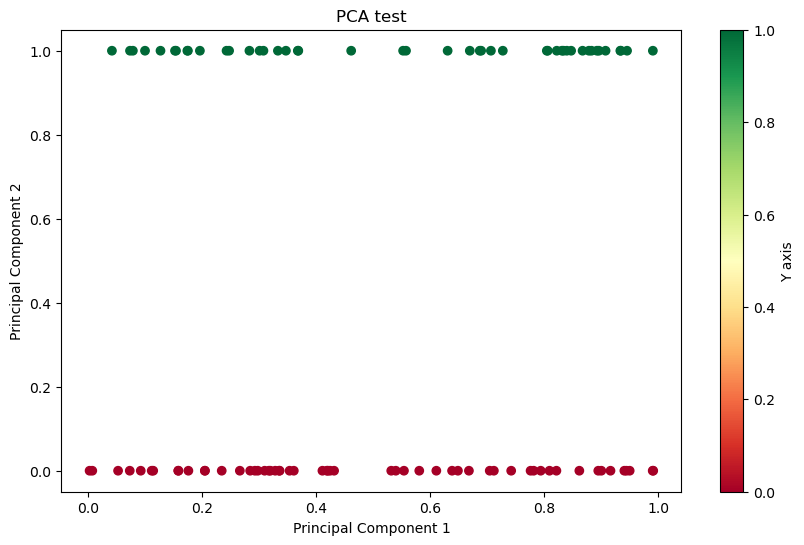

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def visualize_pca(X, Y, title):
    X = X.reshape(-1, 1)
    # Normalize the data using StandardScaler
    # scaler = StandardScaler()
    # X_normalized = scaler.fit_transform(X)

    # Perform PCA with 2 components
    # pca = PCA(n_components=2)
    # X_pca = pca.fit_transform(X_normalized)
 
    # Create a scatter plot with color based on the Y axis
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], Y, c=Y, cmap='RdYlGn')

    # Add labels and a colorbar
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA {title}')
    plt.colorbar(scatter, label='Y axis')

    # Show the plot
    plt.show()

# Example usage:
# Replace X and Y with your actual data
X = np.random.rand(100)  # Replace this with your data
Y = np.random.randint(0, 2, 100)  # Replace this with your labels

visualize_pca(X, Y, "test")

In [117]:
train_df[train_df['label'] == 0]["ts_score"].value_counts()

ts_score
9.0      6814
8.0      6258
11.0     6106
12.0     5897
7.0      5812
         ... 
100.0       1
74.0        1
308.0       1
68.0        1
89.0        1
Name: count, Length: 98, dtype: int64

In [118]:
train_df[train_df['label'] == 1]["ts_score"].value_counts()

ts_score
13.0     6064
14.0     5697
12.0     5371
15.0     5073
11.0     4947
         ... 
344.0       1
82.0        1
65.0        1
92.0        1
44.0        1
Name: count, Length: 87, dtype: int64

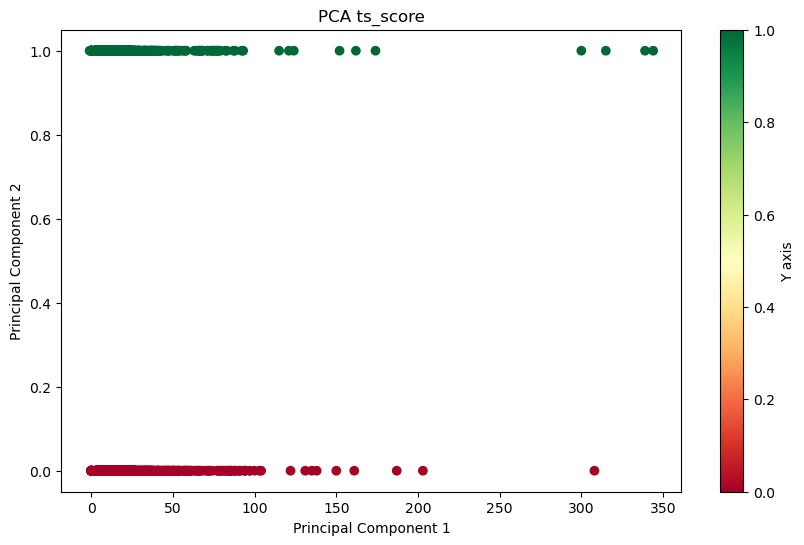

In [119]:
for col in train_df.columns:
    if col.endswith("_score") and col == "ts_score":
        visualize_pca(train_df[col].to_numpy(), train_df['label'], col)

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/semantic-textual-relatedness/Semantic_Relatedness_SemEval2024/main/Track%20A/tel/tel_train.csv")

In [122]:
df.head()

,PairID,Text,Score
0,TEL-train-00001,"""జమ్మూకాశ్మీర్లో మంచుకొండచరియలు విరిగిపడి గురు...",0.88
1,TEL-train-00002,"""కూతురుపైనే కన్నతండ్రి అత్యాచారానికి పాల్పడిన ...",0.87
2,TEL-train-00003,"""గంగా నదిని కాపాడేందుకు ప్రత్యేక చట్టం తీసుకుర...",0.87
3,TEL-train-00004,"""కరోనా వైరస్పై అమెరికా ప్రభుత్వానికి వ్యతిరేకం...",0.84
4,TEL-train-00005,"""కరోనా వైరస్ ( కొవిడ్ - 19 ) మనుషులపైనే కాదు జ...",0.84


In [139]:
df['text1'] = df['Text'].map(lambda x: x.split("\n")[0].strip('"'))
df['text2'] = df['Text'].map(lambda x: x.split("\n")[1].strip('"'))

In [143]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModelForMaskedLM.from_pretrained("xlm-roberta-base")

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [149]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
# sentences = ['This is an example sentence', 'Each sentence is converted']
sentences = [df['text1'][0], df['text1'][0]]
print(sentences)

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/stsb-xlm-r-multilingual')
model = AutoModel.from_pretrained('sentence-transformers/stsb-xlm-r-multilingual')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)

['జమ్మూకాశ్మీర్లో మంచుకొండచరియలు విరిగిపడి గురువారం పెద్ద ప్రమాదం చోటుచేసుకుంది . ఈ ప్రమాదంలో ఐదుగురు మృతి చెందారు . పలువురు గాయపడ్డారు .', 'జమ్మూకాశ్మీర్లో మంచుకొండచరియలు విరిగిపడి గురువారం పెద్ద ప్రమాదం చోటుచేసుకుంది . ఈ ప్రమాదంలో ఐదుగురు మృతి చెందారు . పలువురు గాయపడ్డారు .']
Sentence embeddings:
tensor([[ 0.1411,  0.3951, -0.2394,  ..., -0.3119,  0.0619, -0.1977],
        [ 0.1411,  0.3951, -0.2394,  ..., -0.3119,  0.0619, -0.1977]])


In [150]:
import torch
cos = torch.nn.CosineSimilarity(dim=-1, eps=1e-6)

In [152]:
cos(sentence_embeddings[0], sentence_embeddings[1])

tensor(1.0000)

In [176]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-xlm-r-multilingual-v1')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

In [177]:
from tqdm.auto import tqdm

pred = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    sentences = [row['text1'], row['text2']]
    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    # Perform pooling. In this case, max pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    p = cos(sentence_embeddings[0], sentence_embeddings[1])
    pred.append(p.item())

  0%|          | 0/1170 [00:00<?, ?it/s]

In [178]:
y = df['Score'].tolist()

In [179]:
y_hat = pred

In [180]:
from scipy import stats
stats.spearmanr(y, y_hat)[0]

0.5775418158073532

In [233]:
MODELS = [
    "sentence-transformers/stsb-xlm-r-multilingual",
    "sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens",
    "sentence-transformers/paraphrase-xlm-r-multilingual-v1",
    "symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli",
    "sentence-transformers/xlm-r-distilroberta-base-paraphrase-v1",
    "sentence-transformers/xlm-r-bert-base-nli-stsb-mean-tokens",
    # "lighteternal/stsb-xlm-r-greek-transfer",
    "sayed0am/sn-xlm-roberta-base-snli-mnli-anli-xnli-onnx",
    # "BlackKakapo/stsb-xlm-r-multilingual-ro",
    # "PM-AI/sts_paraphrase_xlm-roberta-base_de-en",
    # "sentence-transformers/xlm-r-large-en-ko-nli-ststb",
]

In [234]:
def get_score(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    
    pred = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        sentences = [row['text1'], row['text2']]
        encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    
        # Compute token embeddings
        with torch.no_grad():
            model_output = model(**encoded_input)
        # Perform pooling. In this case, max pooling.
        sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        p = cos(sentence_embeddings[0], sentence_embeddings[1])
        pred.append(p.item())

        # if i == 10:
        #     break
    y = df['Score'].tolist()
    y_hat = pred

    return stats.spearmanr(y, y_hat)[0]

In [241]:
df = pd.read_csv("https://raw.githubusercontent.com/semantic-textual-relatedness/Semantic_Relatedness_SemEval2024/main/Track%20A/tel/tel_train.csv")

df['text1'] = df['Text'].map(lambda x: x.split("\n")[0].strip('"'))
df['text2'] = df['Text'].map(lambda x: x.split("\n")[1].strip('"'))

df = df.sample(frac=0.2)

len(df)

234

In [242]:
df.head()

,PairID,Text,Score,text1,text2
63,TEL-train-00064,"""ఇబ్రహీంపట్నం మాజీ ఎమ్మెల్యె , సీసీఎం పార్టీ స...",0.75,"ఇబ్రహీంపట్నం మాజీ ఎమ్మెల్యె , సీసీఎం పార్టీ సీ...","ఇబ్రహీంపట్నం మాజీ ఎమ్మెల్యే, సీసీఎం పార్టీ నాయ..."
537,TEL-train-00538,"""ఇక సినిమా షూటింగ్స్లో పాల్గొనడానికి సిద్ధమవుత...",0.50,ఇక సినిమా షూటింగ్స్లో పాల్గొనడానికి సిద్ధమవుతో...,తన అభిమానులను ఉద్దేశిస్తూ రష్మిక మందన్నా ఓ వీడ...
812,TEL-train-00813,"""ఈ రోజు బర్త్ డే సెలబ్రేషన్స్ తో ఫుల్ బిజీ. . ...",0.40,ఈ రోజు బర్త్ డే సెలబ్రేషన్స్ తో ఫుల్ బిజీ. . ర...,"చిరంజీవి, రామ్ చరణ్లతో పాటు నాగ చైతన్య, సమంతలు..."
257,TEL-train-00258,"""ఆ తర్వాత 19 పరుగులకే జాదవ్ రనౌట్ కాగా… 44 పరు...",0.63,ఆ తర్వాత 19 పరుగులకే జాదవ్ రనౌట్ కాగా… 44 పరుగ...,"టీమిండియా బౌలర్లలో అక్షర్ పటేల్ 3 వికెట్లు, బు..."
746,TEL-train-00747,"""పారిస్: స్విట్జర్లాండ్ టెన్నిస్ దిగ్గజం రోజర్...",0.41,పారిస్: స్విట్జర్లాండ్ టెన్నిస్ దిగ్గజం రోజర్ ...,రన్నరప్గా అక్షయ్-ప్రణవ్ జోడీ లక్నో : సయ్యద్ మో...


In [243]:
for model in MODELS:
    print(model.ljust(70), get_score(model))

  0%|          | 0/234 [00:00<?, ?it/s]

sentence-transformers/stsb-xlm-r-multilingual                          0.696223944839298


  0%|          | 0/234 [00:00<?, ?it/s]

sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens    0.696223944839298


  0%|          | 0/234 [00:00<?, ?it/s]

sentence-transformers/paraphrase-xlm-r-multilingual-v1                 0.5988612631711533


  0%|          | 0/234 [00:00<?, ?it/s]

symanto/sn-xlm-roberta-base-snli-mnli-anli-xnli                        0.7137222789150751


  0%|          | 0/234 [00:00<?, ?it/s]

sentence-transformers/xlm-r-distilroberta-base-paraphrase-v1           0.5988612631711533


  0%|          | 0/234 [00:00<?, ?it/s]

sentence-transformers/xlm-r-bert-base-nli-stsb-mean-tokens             0.696223944839298


  0%|          | 0/234 [00:00<?, ?it/s]

sayed0am/sn-xlm-roberta-base-snli-mnli-anli-xnli-onnx                  0.7137222789150751


In [246]:
AUTO_MODELS = [
    "bert-base-multilingual-uncased",
    "xlm-roberta-base",
    "xlm-roberta-large",
    "l3cube-pune/telugu-bert"
]

In [262]:
def get_auto_score(model_name):
    # Load model directly
    from transformers import AutoTokenizer, AutoModel
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    pred = []
    
    for i, row in tqdm(df.iterrows(), total=len(df)):
        sentences = [row['text1'], row['text2']]
        encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
        with torch.no_grad():
            out = model(**encoded_input, output_hidden_states=True).hidden_states[-1]
        emb = out[:, 0, :]
        pred.append(cos(emb[0], emb[1]).item())
    
    y = df['Score'].tolist()
    y_hat = pred
    
    return stats.spearmanr(y, y_hat)[0]

In [263]:
for model in AUTO_MODELS:
    print(model.ljust(70), get_auto_score(model))

  0%|          | 0/234 [00:00<?, ?it/s]

bert-base-multilingual-uncased                                         0.493292181875942


  0%|          | 0/234 [00:00<?, ?it/s]

xlm-roberta-base                                                       0.07788325825558688


  0%|          | 0/234 [00:00<?, ?it/s]

xlm-roberta-large                                                      0.205818479753843


Some weights of BertModel were not initialized from the model checkpoint at l3cube-pune/telugu-bert and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/234 [00:00<?, ?it/s]

l3cube-pune/telugu-bert                                                0.4871159448071612


In [253]:
for model in AUTO_MODELS:
    print(model.ljust(70), get_score(model))

  0%|          | 0/234 [00:00<?, ?it/s]

bert-base-multilingual-uncased                                         0.6188970407488825


  0%|          | 0/234 [00:00<?, ?it/s]

xlm-roberta-base                                                       0.5464665218207456


  0%|          | 0/234 [00:00<?, ?it/s]

xlm-roberta-large                                                      0.5948972104625092


Some weights of BertModel were not initialized from the model checkpoint at l3cube-pune/telugu-bert and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/234 [00:00<?, ?it/s]

l3cube-pune/telugu-bert                                                0.725080337042443


In [258]:
model_name = "l3cube-pune/telugu-bert"

In [259]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

Some weights of BertModel were not initialized from the model checkpoint at l3cube-pune/telugu-bert and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [267]:
df['text1']

63      ఇబ్రహీంపట్నం మాజీ ఎమ్మెల్యె , సీసీఎం పార్టీ సీ...
537     ఇక సినిమా షూటింగ్స్లో పాల్గొనడానికి సిద్ధమవుతో...
812     ఈ రోజు బర్త్ డే సెలబ్రేషన్స్ తో ఫుల్ బిజీ. . ర...
257     ఆ తర్వాత 19 పరుగులకే జాదవ్ రనౌట్ కాగా… 44 పరుగ...
746     పారిస్: స్విట్జర్లాండ్ టెన్నిస్ దిగ్గజం రోజర్ ...
                              ...                        
487     కాగా ఏక్తా కపూర్ ‘కామసూత్ర’ ఆధారంగా ఓ వెబ్సిరీ...
14      ప్రధాన సమాచార కమిషనర్గా ఆర్కే మాథుర్ సోమవారం బ...
92      కరోనా వైరస్ ప్రభావం ఖైరతాబాద్ గణేశ్డిపై కూడా ప...
1123    మల్లికార్జున్ గౌడ్ను అదుపులోకి తీసుకొని కేసు న...
220     రైల్వే శాఖ ప్రైవేటీకరణపై స్పందించిన మంత్రి పియూష్
Name: text1, Length: 234, dtype: object

In [275]:
df = pd.read_csv("https://raw.githubusercontent.com/semantic-textual-relatedness/Semantic_Relatedness_SemEval2024/main/Track%20A/tel/tel_train.csv")

df['text1'] = df['Text'].map(lambda x: x.split("\n")[0].strip('"'))
df['text2'] = df['Text'].map(lambda x: x.split("\n")[1].strip('"'))

In [293]:
lens1 = []
lens2 = []
for i in range(len(df)):
    l1 = tokenizer(df['text1'].tolist()[i], max_length=30000)
    l2 = tokenizer(df['text2'].tolist()[i], max_length=30000)
    lens1.append(len(l1['input_ids']))
    lens2.append(len(l2['input_ids']))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [294]:
np.mean(lens1), np.max(lens1)

(23.986324786324786, 66)

In [295]:
np.mean(lens2), np.max(lens2)

(24.416239316239317, 94)

In [297]:
len(df)

1170

In [339]:
def mean_pooling(token_embeddings, attention_mask):
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def max_pooling(token_embeddings, attention_mask):
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    token_embeddings[input_mask_expanded == 0] = -1e9
    return torch.max(token_embeddings, 1)[0]

def get_result(model_name, pooling='mean'):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    
    pred = []
    for i, row in tqdm(df.iterrows(), total=len(df)):
        sentences = [row['text1'], row['text2']]
        encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')
    
        # Compute token embeddings
        with torch.no_grad():
            model_output = model(**encoded_input, return_dict=True)#, output_hidden_states=True)
            # print(model_output.keys())
            model_output = model_output.last_hidden_state
        # Perform pooling. In this case, max pooling.

        if pooling == 'mean':
            sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
        elif pooling == 'max':
            sentence_embeddings = max_pooling(model_output, encoded_input['attention_mask'])
        else:
            sentence_embeddings = model_output[:, 0, :]
            
        p = cos(sentence_embeddings[0], sentence_embeddings[1])
        pred.append(p.item())

        # if i == 10:
        #     break
    y = df['Score'].tolist()[:len(pred)]
    y_hat = pred

    return stats.spearmanr(y, y_hat)[0]

In [340]:
TELUGU_MODELS = [
    "ltrctelugu/ltrc-albert",
    "ltrctelugu/ltrc-distilbert",
    "ltrctelugu/ltrc-roberta",
    "ltrctelugu/roberta_ltrc_telugu",
    "ltrctelugu/bert_ltrc_telugu"
]

In [342]:
TELEGU_MODELS = [
    'l3cube-pune/indic-sentence-similarity-sbert',
    'l3cube-pune/telugu-sentence-similarity-sbert',
    'l3cube-pune/telugu-sentence-bert-nli',
    'l3cube-pune/telugu-bert-scratch',
    'l3cube-pune/telugu-bert'
]


results = []
for model in TELUGU_MODELS:
    for pooling in ['mean', 'max', 'cls']:
        res = get_result(model, pooling)
        result = f"{model}".ljust(70) + " " + f"{pooling}".ljust(7) + " " + str(res)
        print(result)
        results.append(result)

for r in results:
    print(r)

Some weights of AlbertModel were not initialized from the model checkpoint at ltrctelugu/ltrc-albert and are newly initialized: ['albert.pooler.weight', 'albert.pooler.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1170 [00:00<?, ?it/s]

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 11 and the array at index 1 has size 1170